In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
train = pd.read_csv("G:/data/Sports-data-analysis/train.csv")
test = pd.read_csv("G:/data/Sports-data-analysis/test.csv")

print("train.shape = {} rows, {} cols".format(*train.shape))
print("test.shape = {} rows, {} cols".format(*test.shape))

train.shape = 200000 rows, 202 cols
test.shape = 200000 rows, 201 cols


In [13]:
train.head(3)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965


In [4]:
print ('Количиство пропущенных значений в трейне =', train.isnull().sum().sum())

Количиство пропущенных значений в трейне = 0


In [5]:
print ('Количиство пропущенных значений в тесте =', test.isnull().sum().sum())

Количиство пропущенных значений в тесте = 0


Пропущенные значения отсудствуют

In [6]:
train.target.unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='target', ylabel='count'>

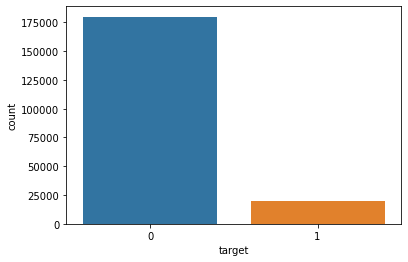

In [7]:
sns.countplot(train['target'])

Целевая переменная имеет бинарное распределение. Имеется перекос в сторону 0 значения

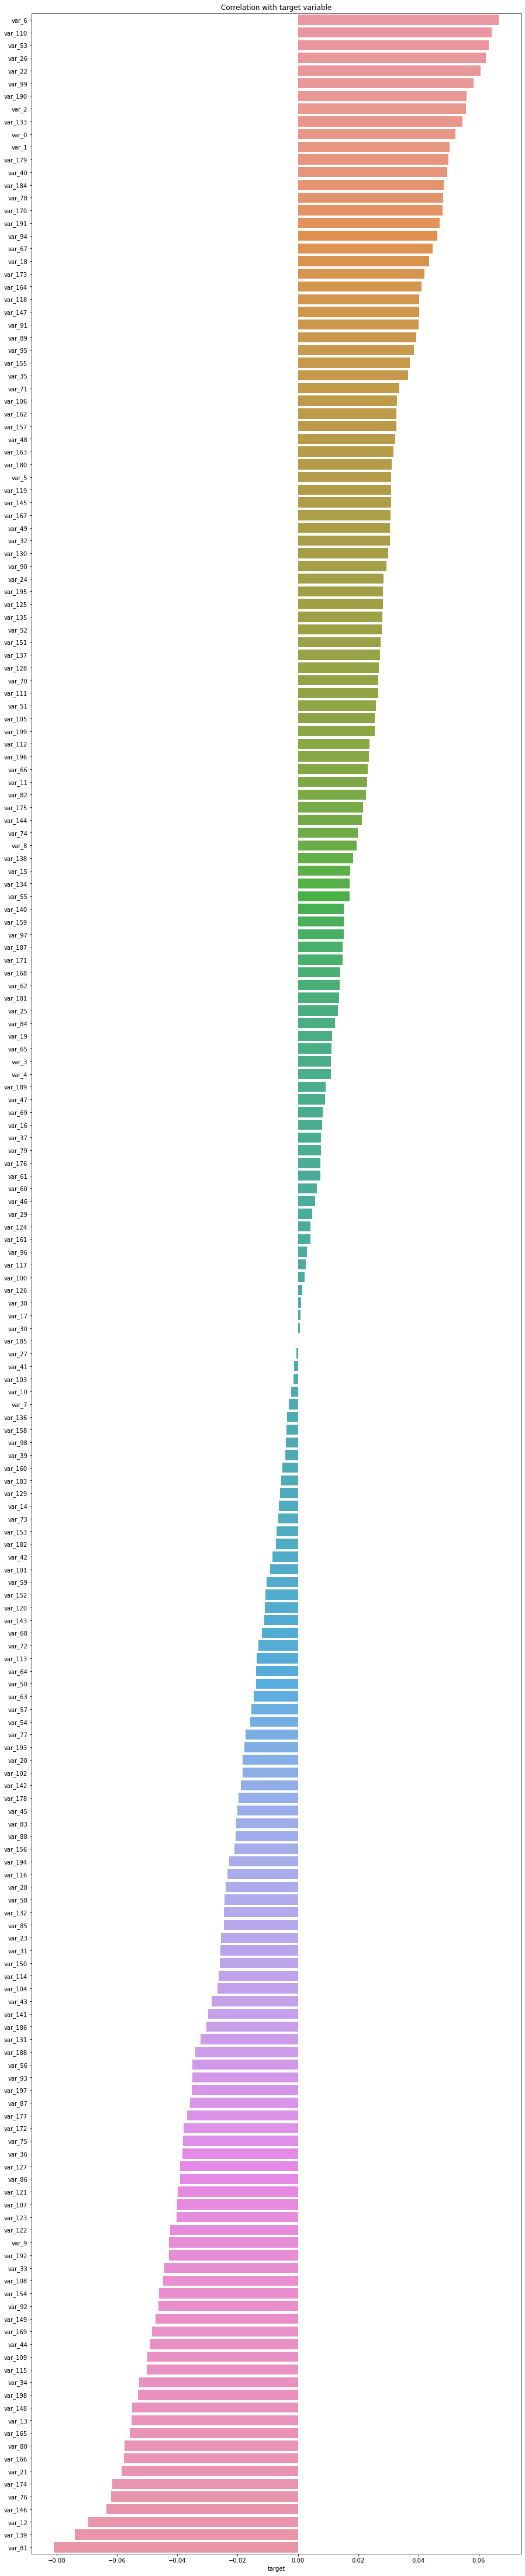

In [12]:
#Кореляция факторов с целевой переменной
cor = train.corr().iloc[1:,0].sort_values(ascending=False)

plt.figure(figsize=(15, cor.shape[0] * 0.4))
sns.barplot(x=cor, y=cor.index)
plt.title('Correlation with target variable')
plt.show();

In [28]:
cor.gt(0).sum()

105

target имеет положительную корреляцию со 105 сущностями

In [32]:
numerical_features = train.select_dtypes(include=[np.number])

Text(0, 0.5, 'Density')

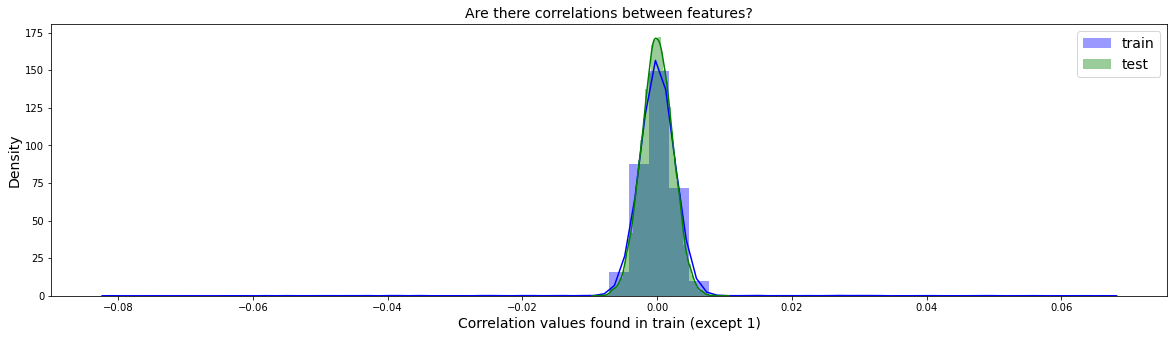

In [36]:
train_correlations = numerical_features.corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

columns = numerical_features.columns.tolist()
columns.remove("target")

test_correlations = test[columns].corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Green", label="test")

plt.xlabel("Correlation values found in train (except 1)", size=14)
plt.title("Are there correlations between features?", size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)

Ипризнаки имеют нормальное распределение

In [41]:
FEATS = ['var_0', 'var_1', 'var_2', 'var_5', 'var_9', 'var_10', 'var_13', 'var_20', 'var_26',
                'var_40', 'var_55', 'var_80', 'var_106', 'var_109', 'var_139', 'var_175', 'var_184', 
                'var_196', 'target']

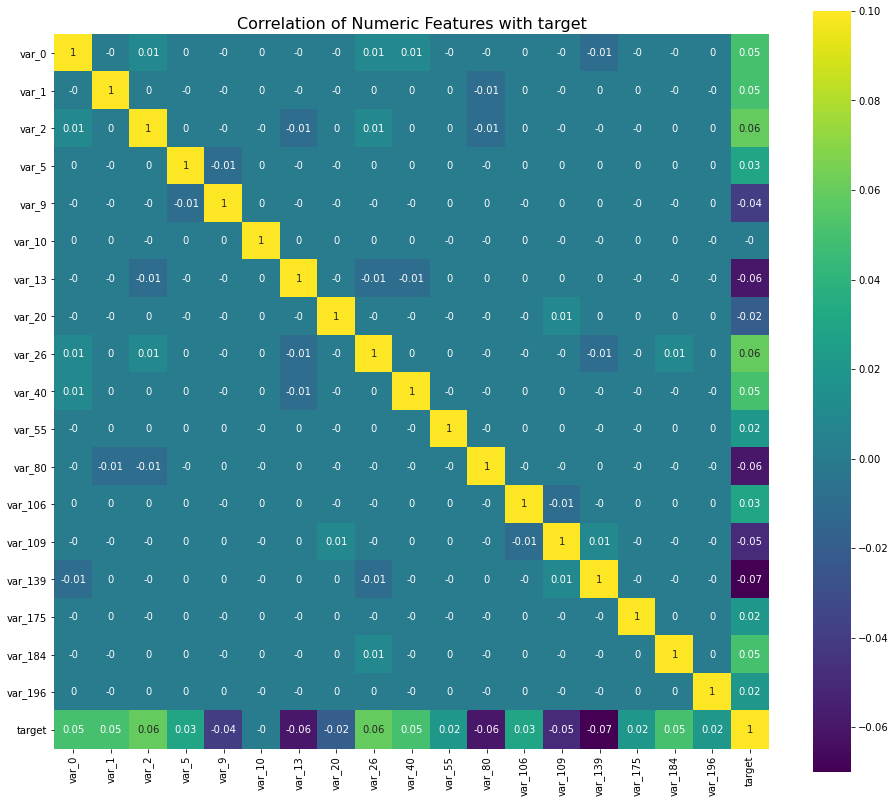

In [42]:
fig, axes = plt.subplots(figsize = (16,14))
plt.title("Correlation of Numeric Features with target", y=1, size=16)
sns.heatmap(train[FEATS].corr().round(2), square=True, vmax=0.1, cmap="viridis", annot=True);